In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r'D:\netflix_titles.csv')
print("Shape:", df.shape)
print(df.head(3))


Shape: (6234, 12)
    show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   

     rating  duration                           li

In [17]:
import pandas as pd
# data cleaning
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
# Fill missing values
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Unknown')


C:\Users\SMARTLAPTOP\AppData\Local\Temp\ipykernel_1472\2081823629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set3')


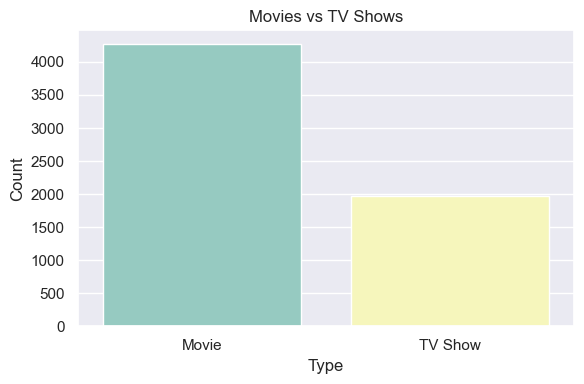

In [97]:
sns.set(style='darkgrid')

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set3')
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

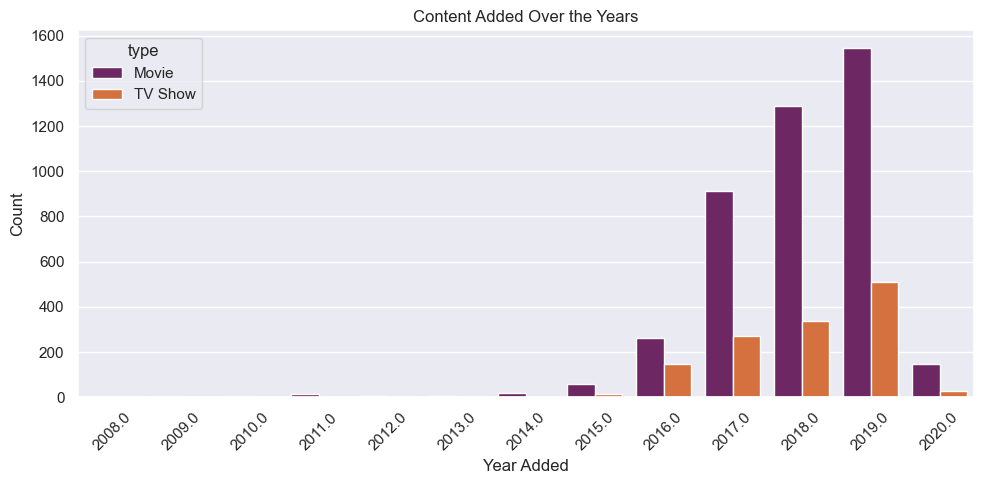

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='year_added', hue='type', palette='inferno')
plt.title('Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


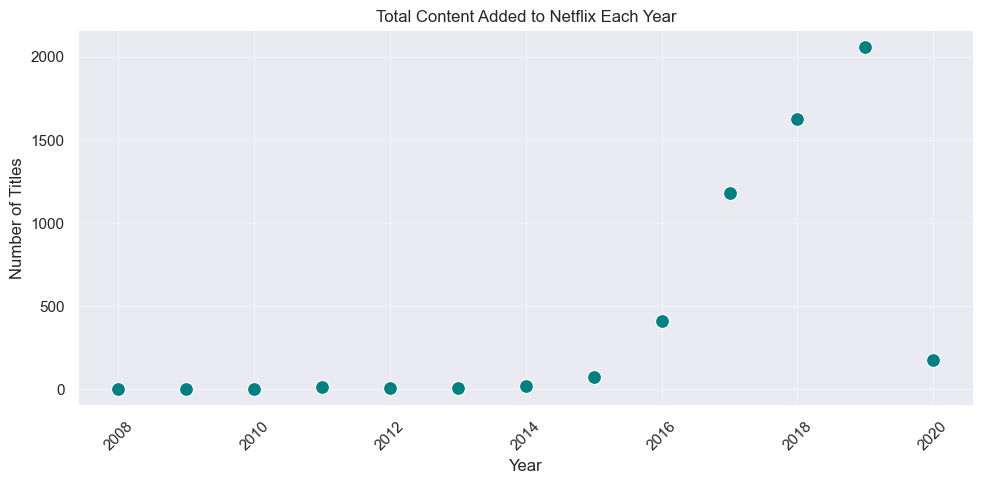

In [77]:
yearly_counts = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=yearly_counts.index,
    y=yearly_counts.values,
    color='teal',   
    s=100,                
    marker='o'
)
plt.title('Total Content Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\SMARTLAPTOP\AppData\Local\Temp\ipykernel_1472\132945787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


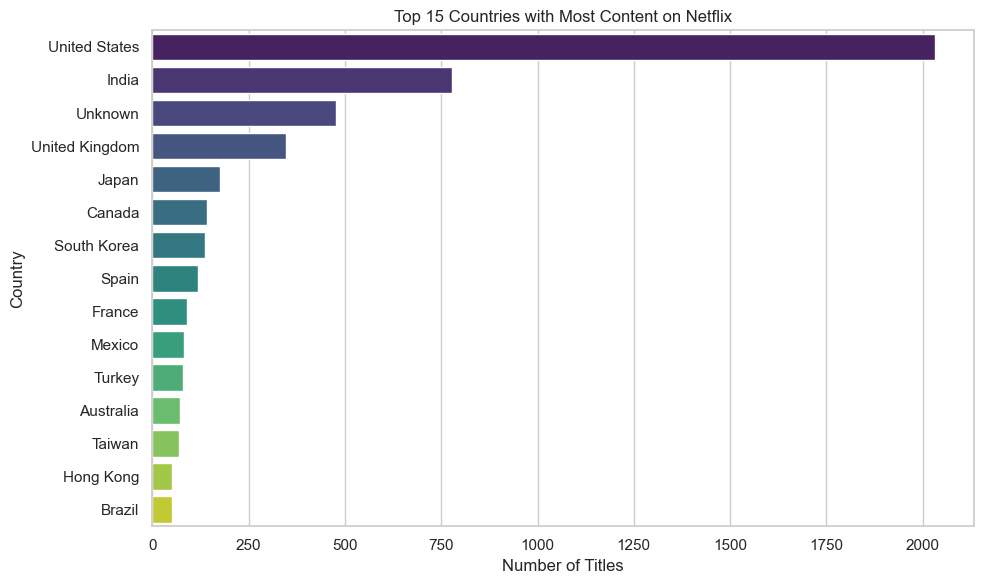

In [85]:
top_countries = df['country'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 15 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

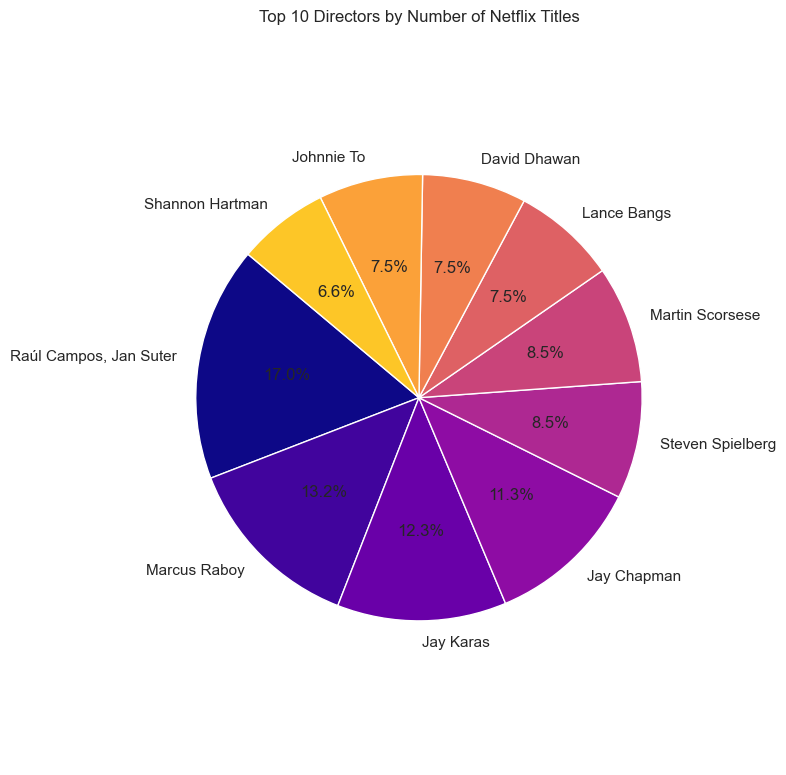

In [87]:
top_directors = df[df['director'] != 'No Director']['director'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(
    top_directors.values,
    labels=top_directors.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.plasma(range(0, 256, 25))
)
plt.title('Top 10 Directors by Number of Netflix Titles')
plt.axis('equal')
plt.tight_layout()
plt.show()



C:\Users\SMARTLAPTOP\AppData\Local\Temp\ipykernel_1472\1124115075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


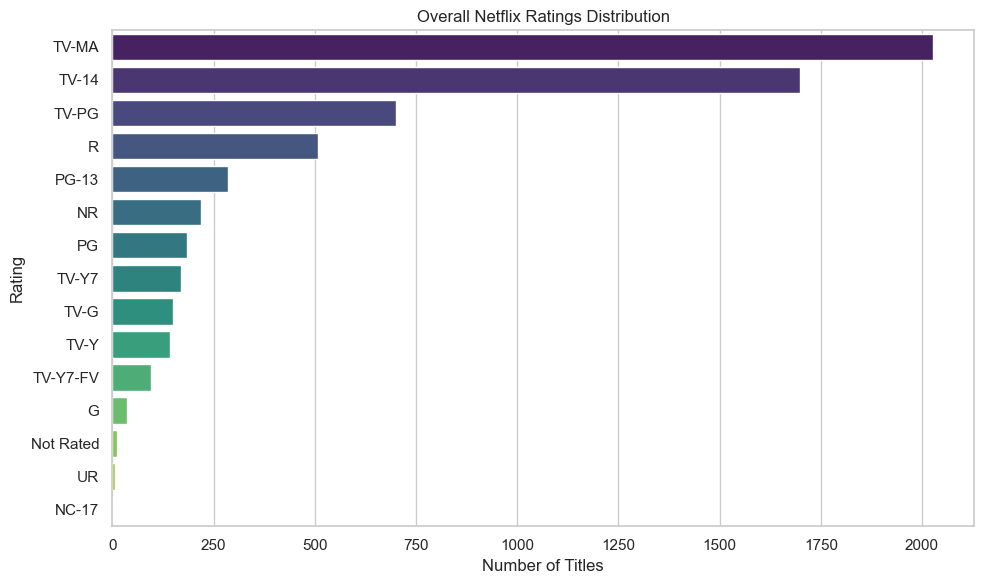

In [94]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='rating',
    order=df['rating'].value_counts().index,
    palette='viridis'
)
plt.title('Overall Netflix Ratings Distribution')
plt.xlabel('Number of Titles')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

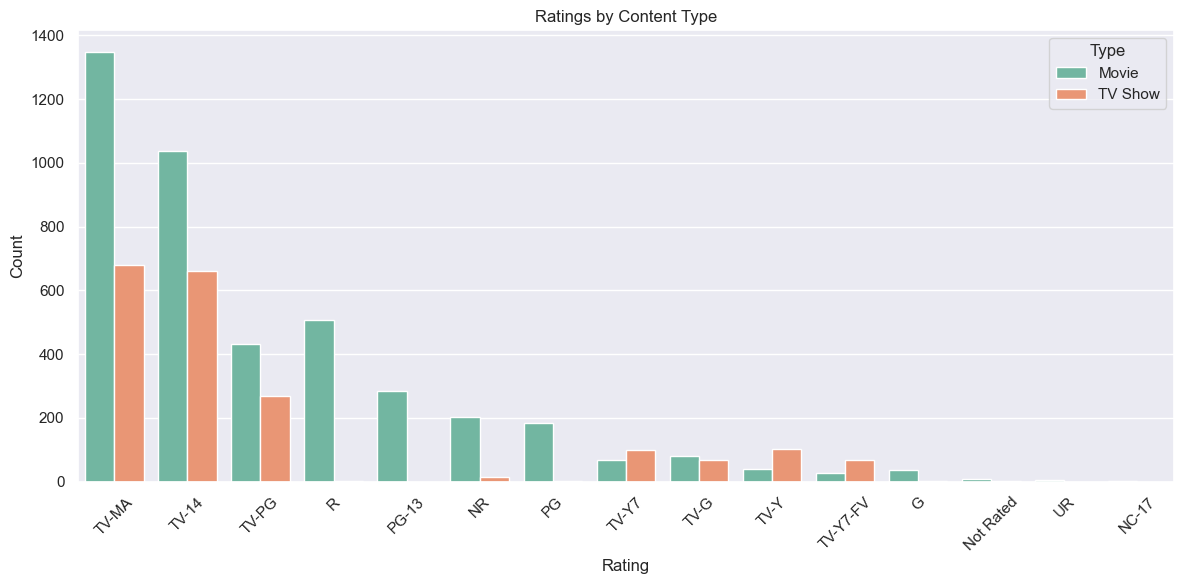

In [107]:
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='rating',
    hue='type',
    order=df['rating'].value_counts().index,
    palette='Set2'
)
plt.title('Ratings by Content Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()


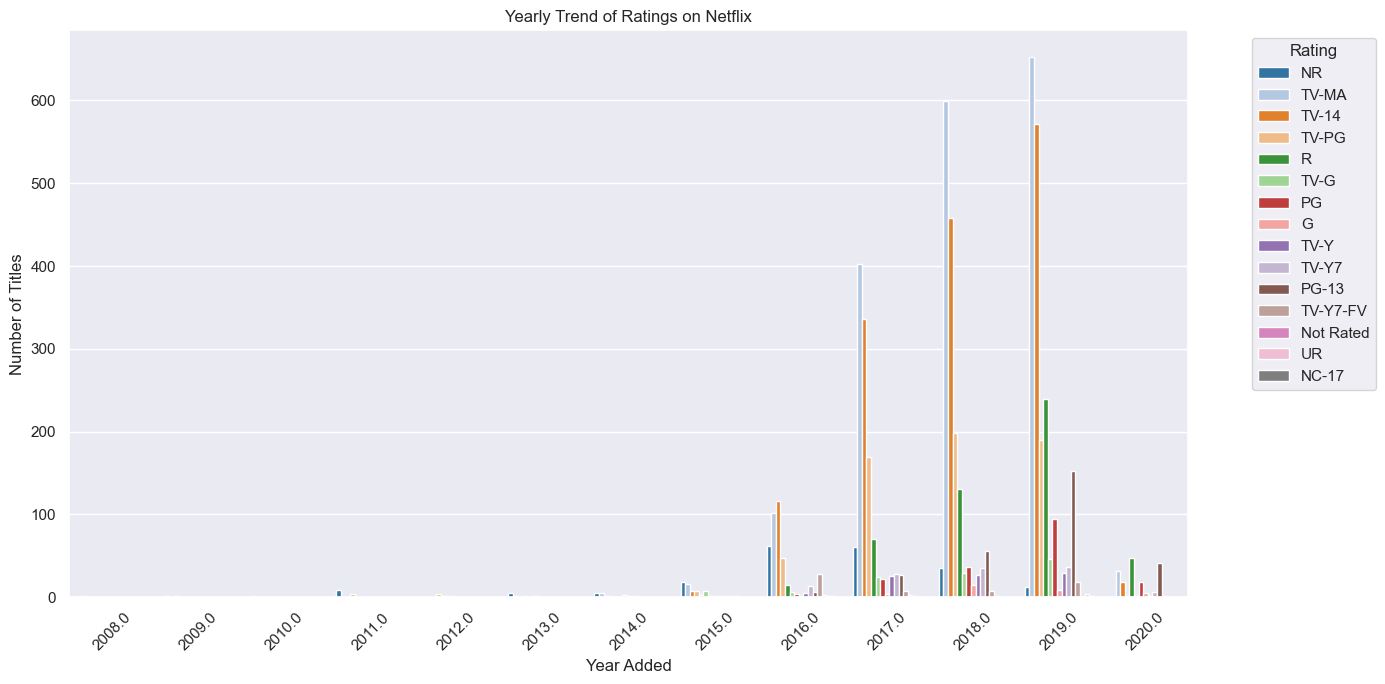

In [101]:
plt.figure(figsize=(14, 7))
sns.countplot(
    data=df[df['year_added'].notna()],
    x='year_added',
    hue='rating',
    palette='tab20',
    order=sorted(df['year_added'].dropna().unique())
)
plt.title('Yearly Trend of Ratings on Netflix')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


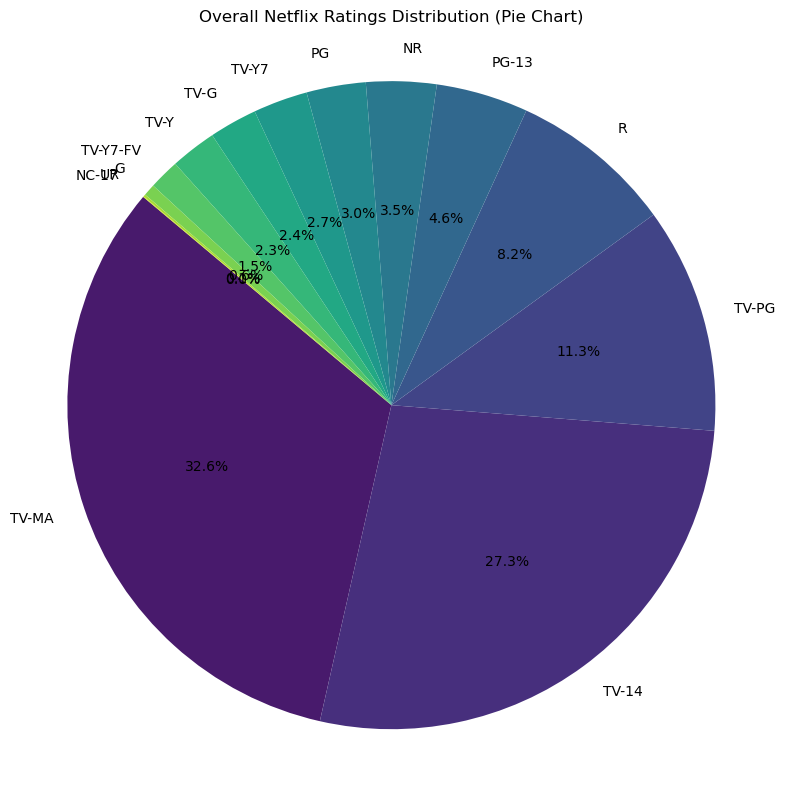

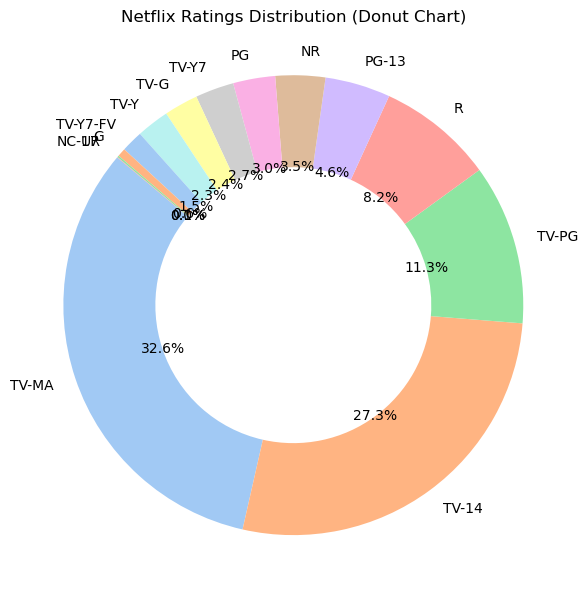

In [12]:
# Pie chart with a hole (donut chart)
plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette('pastel', len(rating_counts)), wedgeprops=dict(width=0.4))
plt.title('Netflix Ratings Distribution (Donut Chart)')
plt.axis('equal')
plt.tight_layout()
plt.show()
